## PREPROCESSING

### Install and Importing Library/Package

In [2]:
%pip install emoji


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import nltk
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from keras.models import load_model
from tensorflow import keras

nltk.download("stopwords")
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# for preparing input type model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import emoji
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
from nltk.tokenize import word_tokenize

2024-12-09 15:15:51.895973: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 15:15:52.031549: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 15:15:52.110330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 15:15:52.205747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 15:15:52.231220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 15:15:52.389816: I tensorflow/core/platform/cpu_feature_gu

### Gathering Data

Our source dataset : https://www.kaggle.com/datasets/nelgiriyewithana/emotions

In [4]:
import zipfile
import os

# Path to the zip file
zip_file_path = "../datasets/raw/emotions.zip"

# Directory to extract the contents
extract_to_path = "../datasets/raw/"

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Extracted files to: {extract_to_path}")

Extracted files to: ../datasets/raw/


In [5]:
df = pd.read_csv('../datasets/raw/text.csv')

df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


#### Melakukan Pembersihan Dataset

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
print(f'Dataset Shape : {df.shape}')


Dataset Shape : (416809, 2)


In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df.duplicated().sum()


686

In [10]:
df['label'].nunique()

6

#### Melakukan Plot Data untuk Mengetahui Distribusi Label

In [ ]:
emotions = {

    0: 'sadness',

    1: 'joy',

    2: 'love',

    3: 'anger',

    4: 'fear',
    
    5: 'surprise'

}

df['kategori'] = df['label'].map(emotions)

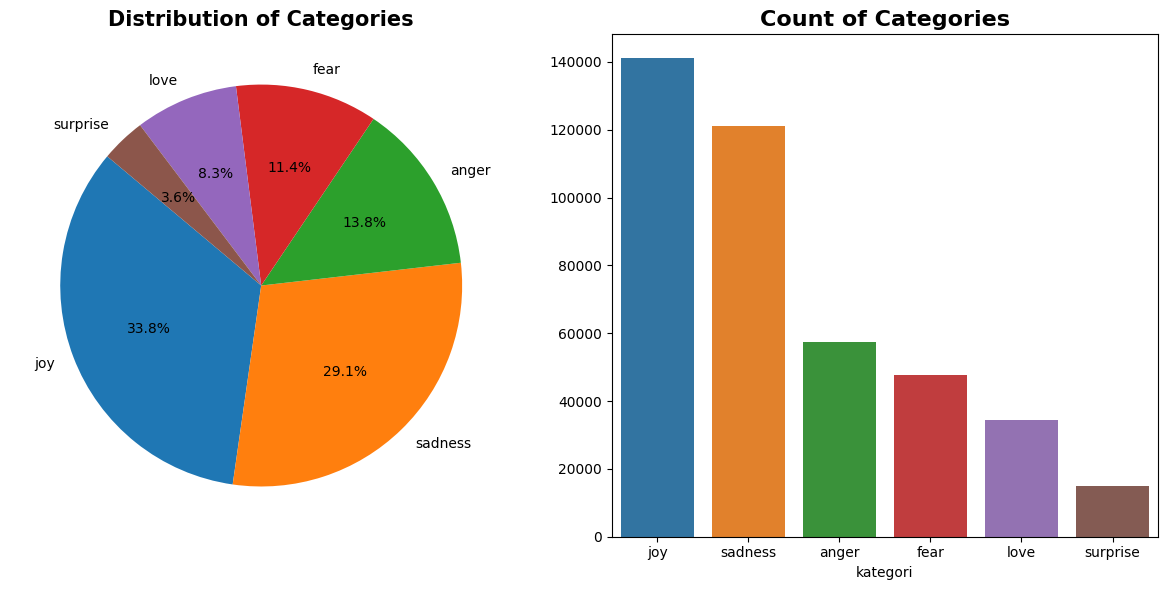

In [12]:
count = df['kategori'].value_counts()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories', fontsize=15, fontweight='bold')

sns.barplot(x=count.index, y=count.values, ax=axs[1], hue=count.index, dodge=False)
axs[1].set_title('Count of Categories', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

In [13]:
df = df.drop(columns=['kategori'])

In [14]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


#### Melakukan Preproses Dataset Teks

In [15]:
def preprocess_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = emoji.demojize(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)


df['text'] = df['text'].apply(preprocess_text)
df[['text']].head()

,text
0,feel really helpless heavy hearted
1,ive enjoyed able slouch relax unwind frankly n...
2,gave internship dmrg feeling distraught
3,dont know feel lost
4,kindergarten teacher thoroughly weary job take...


#### Mengekspor Hasil Premrosesan Dataset

In [17]:
df.to_csv('../datasets/output_preprocess/dataset.csv', index=False)